### Load a saved model and try predicting captions

In [13]:
import time
import pickle

import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model

In [14]:
from IPython.display import SVG
from keras.utils import model_to_dot

In [15]:
# standard variables
MAX_LENGTH = 52
VOCAB_SIZE = 6321 # Using unique words as vocab here.
NPIX = 299
TARGET_SIZE = (NPIX,NPIX,3)
EMBEDDING_SIZE = 300

In [16]:
def load_model(path):
    with open(path,"r") as f:
        model = model_from_json(f.read())
    print("Model loaded successfully")
    return model

def load_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

index_and_words = load_pickle("index_and_words.pkl")
ix_to_word = index_and_words['ix_to_word']
word_to_ix = index_and_words['word_to_ix']

print(len(ix_to_word))
print(len(word_to_ix))

6320
6320


#### load and configure inception model
We do this if we're loading raw images. 

If images are preprocessed, simply load the pickle and feed the feature vector to the model as input.

In [17]:
inception = InceptionV3(weights='imagenet')

# pop the last softmax layer and freezing the remaining layers
inception.layers.pop()

for layer in inception.layers:
    layer.trainable = False

modified_inception = Model(input = inception.input, output=inception.layers[-1].output)

/mnt/c/Users/Kanishk/Documents/Projects/sem6/wsl/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("av...)`
  if __name__ == '__main__':


#### Load our CNN+RNN model along with trained weights

In [18]:
model = load_model("model.json")

# loading the weights of the model
model.load_weights("model_weights/model_demo16.h5")

Model loaded successfully


In [19]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(MAX_LENGTH):
        sequence = [word_to_ix[w] for w in in_text.split() if w in word_to_ix]
        sequence = pad_sequences([sequence], maxlen=MAX_LENGTH)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ix_to_word[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [20]:
def getFeatureVector(imgPath):
    try:
        img = load_img(imgPath, target_size=TARGET_SIZE)
    except OSError as e:
        print("Problem with image:",e)
    
    # Converting image to array
    img_array = img_to_array(img)
    nimage = preprocess_input(img_array)
    # Adding one more dimesion
    nimage = np.expand_dims(nimage, axis=0)    
    fea_vec = modified_inception.predict(nimage)
    return np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )

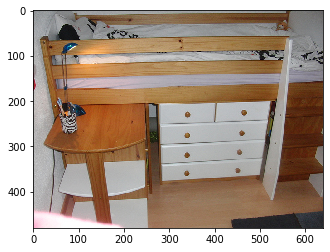

Greedy: a wooden bunk bed with a wooden frame


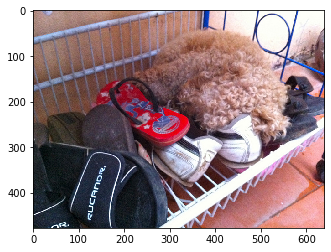

Greedy: a dog sitting on a chair next to a stuffed animal


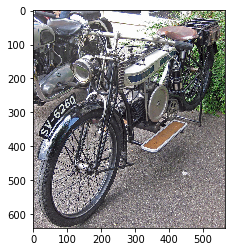

Greedy: a motorcycle parked on the side of the road


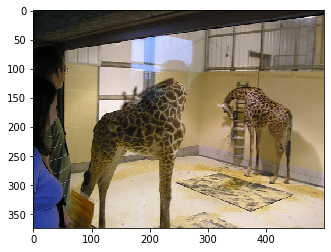

Greedy: a giraffe standing next to a tall building


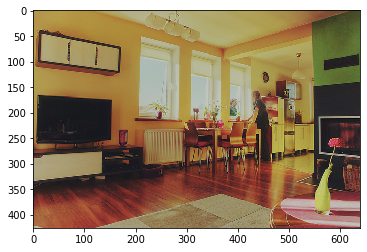

Greedy: a living room with a couch and a tv


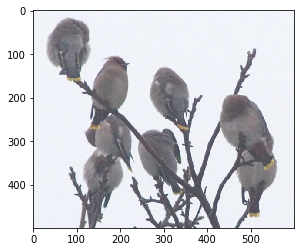

Greedy: a bird sitting on a branch in the grass


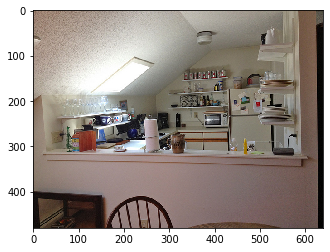

Greedy: a kitchen with a stove and a sink


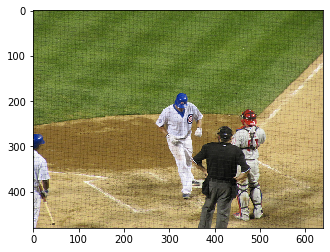

Greedy: a baseball player holding a bat on a field


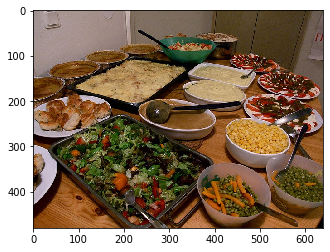

Greedy: a table with a lot of food on it


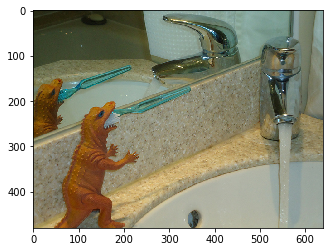

Greedy: a bathroom with a sink and a mirror


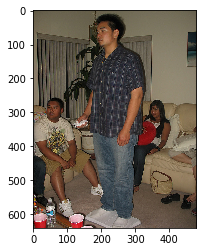

Greedy: a group of people playing a game with remote controllers


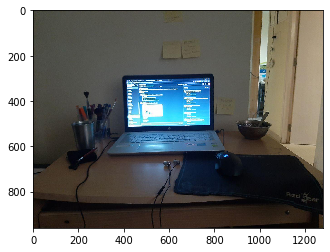

Greedy: a laptop computer sitting on top of a wooden desk
Captioned 12 images in 13.98s


In [21]:
# pic = list(encoding_test.keys())[z]
# imgPath = "./coco/train2014/COCO_train2014_000000000030.jpg"
images = ['./coco/COCO_val2014_000000000133.jpg',
          './coco/COCO_val2014_000000000042.jpg',
          './coco/COCO_val2014_000000000073.jpg',
          './coco/COCO_val2014_000000000136.jpg',
          './coco/COCO_val2014_000000000139.jpg',
          './coco/COCO_val2014_000000000143.jpg',
          './coco/COCO_val2014_000000000164.jpg',
          './coco/COCO_val2014_000000000192.jpg',
          './coco/COCO_val2014_000000000196.jpg',
          './coco/COCO_val2014_000000000208.jpg',
          './coco/COCO_val2014_000000000241.jpg',
          './coco/photo_2020-03-04_18-06-03.jpg']

start = time.time()
for imgPath in images:
    image = getFeatureVector(imgPath)
    image = image.reshape((1,2048))
    x=plt.imread(imgPath)
    plt.imshow(x)
    plt.show()
    print("Greedy:",greedySearch(image))
print("Captioned {} images in {:.2f}s".format(len(images), time.time() - start))